# Machine Learning
---------


### Author Information
**Author:** PJ Gibson  
**Email:** Peter.Gibson@doh.wa.gov  
**Github:**   https://github.com/DOH-PJG1303

### Project Information
**Created Date:** 2023-05-27  
**Last Updated:** 2023-05-27  
**Version:** 1  

### Description
This notebook should serve to educate newcomers to Python on simple Machine Learning techniques in the context of Record Linkage.

### Notes


## 1. Import Libraries

In [41]:
# Standard data analysis tools
import pandas as pd
import numpy as np

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

# Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Prep Data

### 2.1 Read in data

In [42]:
df1 = pd.read_csv('Data/synthetic_df1.csv', dtype=str)
df2 = pd.read_csv('Data/synthetic_df2.csv', dtype=str)

df = pd.read_csv('Data/synthetic_training_data.csv')

### 2.2 Test Train Split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1), df['label'], test_size=0.2, random_state=42)

## 3. Machine Learning Training

### 3.1 Decision Tree


#### Notes on parameter tuning
----- 

Parameter tuning in machine learning is the process of selecting the appropriate set of optimal parameters for a model in order to improve its accuracy or other metrics. In the case of the Decision Tree, the parameters we are tuning are 'max_depth' and 'criterion'.

'max_depth' is the maximum depth of the tree. It is used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample.
'criterion' is the function to measure the quality of a split. Sklearn supports “gini” for the Gini impurity and “entropy” for the information gain.
GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In our code, we used GridSearchCV with 5-fold cross-validation for the hyperparameter tuning of our Decision Tree model. This means the training set is split into 5 parts and the model will be trained and validated 5 times to get a better estimate of the model performance.

After identifying the best parameters using GridSearchCV, the model is evaluated on the test data. Evaluation metrics like the classification report and confusion matrix provide comprehensive insights about model performance. The classification report shows precision, recall, f1-score, and support for each class while the confusion matrix visualizes the correct predictions and the errors made by the model.

In [44]:
# Define parameter grid
param_grid = {'max_depth': range(1, 11), 'criterion': ['gini', 'entropy']}

# Initialize a DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11)},
             scoring='accuracy')

Best parameters: {'criterion': 'entropy', 'max_depth': 10}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19616
           1       0.99      0.99      0.99     19627

    accuracy                           0.99     39243
   macro avg       0.99      0.99      0.99     39243
weighted avg       0.99      0.99      0.99     39243

Accuracy: 0.9944703514002498


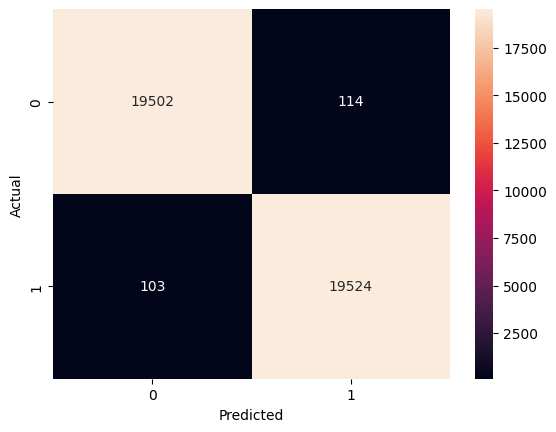

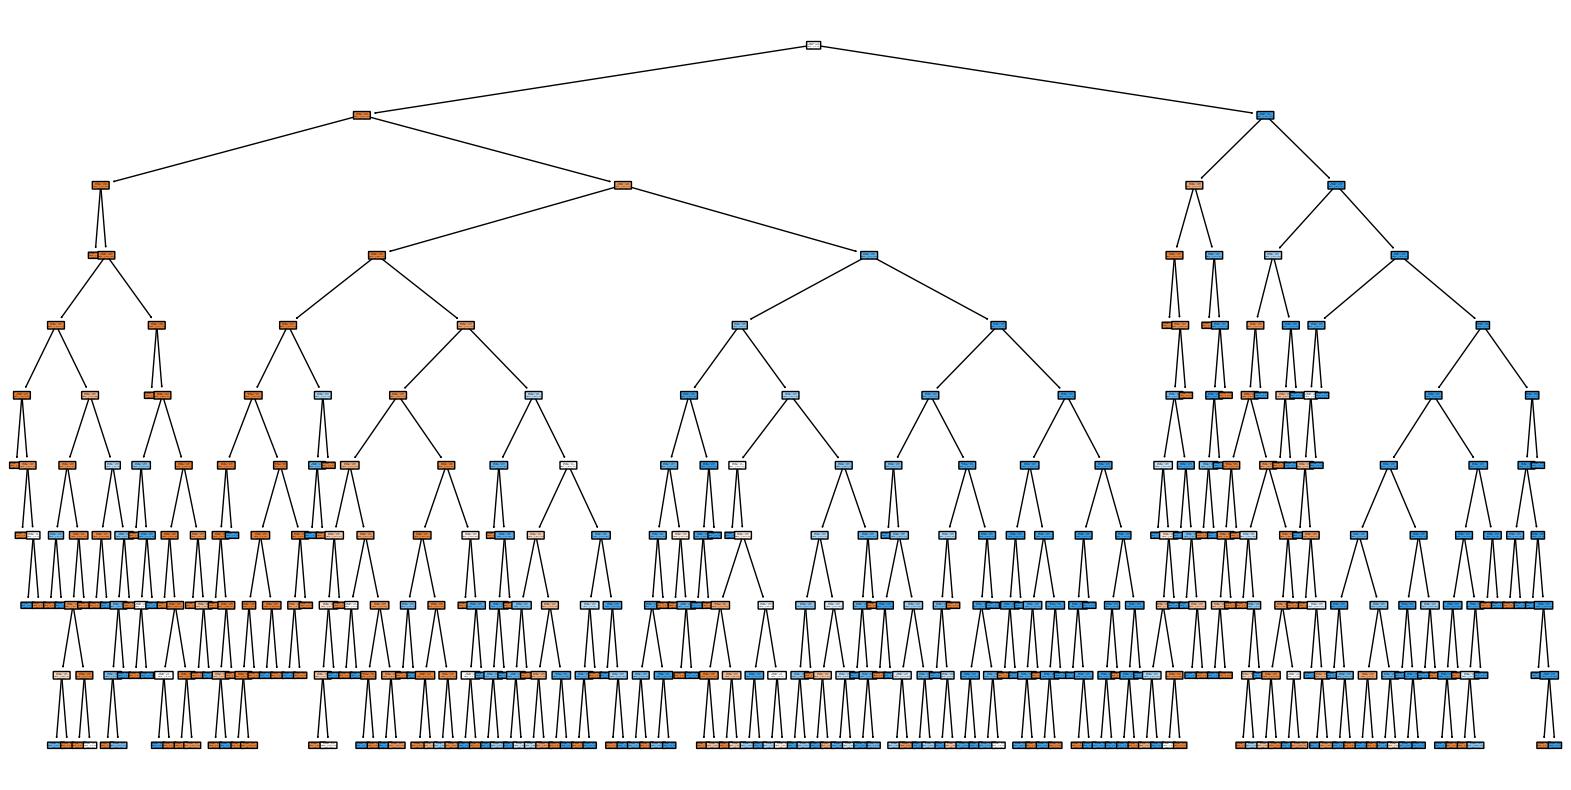

In [45]:
# Print the best parameters
print(f"Best parameters: {grid.best_params_}")

# Predict on the test data
y_pred = grid.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Assuming grid.best_estimator_ is your trained DecisionTreeClassifier
dt_best = grid.best_estimator_

# Set larger figure size
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(dt_best, filled=True, rounded=True, feature_names=X_train.columns, class_names=True, proportion=True)

# Show the plot
plt.show()

In [48]:
list_results = y_pred == y_test
wrong_guess_indices = list_results[list_results == False].index
wrong_responses = df.iloc[wrong_guess_indices]

for i in range(0,5):
    df1_index = wrong_responses.iloc[i]['Unnamed: 0']
    df2_index = wrong_responses.iloc[i]['Unnamed: 1']
    label = wrong_responses.iloc[i]['label']
    part1 = df1.loc[int(df1_index)]
    part2 = df2.loc[int(df2_index)]
    combined = pd.concat([part1,part2], ignore_index=True, axis=1).transpose()
    print(f'label = {label}')
    display(combined)
    print('\n\n')

label = 0.0


,fname,mname,lname,dob,sex,phone,email,add,zip,county,state,unique_id,ssn,partnership_id,parents_partnership_id,house_id,building_id
0,KAYLEE,SOPHIE,SPINLER,2015-02-05,F,9718553662,NaN,1288 NW 6th St,97030,Multnomah County,OR,343597385231,969-67-7263,NaN,1100275,120259092867,360267
1,SUMMER,NaN,SPINLER,2015-02-05,F,(971)-855-3662,NaN,1288 NW 6th St,97030,Multnomah County,OR,112,456-27-1177,NaN,1100275,120259092867,360267





label = 0.0


,fname,mname,lname,dob,sex,phone,email,add,zip,county,state,unique_id,ssn,partnership_id,parents_partnership_id,house_id,building_id
0,ADAM,WILLIAM,DECARLO,2007-04-07,M,5419077351,NaN,722 3rd St SE,97411,Coos County,OR,420906796279,543-55-6159,NaN,955193,171798723791,2665649
1,JOHN,NaN,DECARLO,2007-04-07,M,(541)-907-7351,NaN,722 3rd St SE,97411,Coos County,OR,25769805106,543-55-6270,NaN,955193,171798723791,2665649





label = 0.0


,fname,mname,lname,dob,sex,phone,email,add,zip,county,state,unique_id,ssn,partnership_id,parents_partnership_id,house_id,building_id
0,JULIA,TIFFANY,SMITH,1994-03-12,F,5412948375,NaN,1395 McDaniel Rd,97753,Crook County,OR,283467842625,543-26-8319,NaN,824588,206158567659,828292
1,OLIVIAMARIA,MARIA,SMITH,1994-03-12,F,(541)-353-6320,NaN,15528 S Maple Grove Rd,97038,Clackamas County,OR,515396076635,543-26-8356,NaN,824588,137439081203,1460867





label = 0.0


,fname,mname,lname,dob,sex,phone,email,add,zip,county,state,unique_id,ssn,partnership_id,parents_partnership_id,house_id,building_id
0,ELIJAH,JACOB,OCHOA,2015-03-29,M,5038090938,NaN,33422 Cherry Way UNIT 13,97056,Columbia County,OR,532575946191,544-04-2316,NaN,1081986,34359744553,1719063
1,EMMA,VICTORIA,OCHOA,2015-03-29,F,(503)-809-0938,NaN,33422 Cherry Way UNIT 13,97056,Columbia County,OR,335007450594,750-29-9285,NaN,1081986,34359744553,1719063





label = 0.0


,fname,mname,lname,dob,sex,phone,email,add,zip,county,state,unique_id,ssn,partnership_id,parents_partnership_id,house_id,building_id
0,JOYCE,GLADYS,BOULEY,1935-08-26,F,5036798242,JUDAIC-JOYCE@GMAIL.COM,563 1st St,97417,Douglas County,OR,171798692025,541-18-0971,517499,233966,171798740971,3209072
1,JOSE,NaN,BELL,NaN,M,(541)-844-4420,NaN,637 Harrison St,97045,Clackamas County,OR,120259084522,541-47-4928,NaN,336124,180388660048,1216989


In [24]:
pd.concat([part1,part2], ignore_index=True, axis=1).transpose()

,ssn,fname,lname,dob,phone,add,unique_id,parents_partnership_id,house_id,building_id
0,251-68-3727,CHARLIE,KETTLER,2011-02-08,5419479698,93720 Raymond Ln,17179869469,1205220,137439033109,2105298
1,432-16-2877,THEODORE,KETTLER,NaN,(541)-947-9698,93720 Raymond Ln,17179869639,1205220,137439033109,2105298
